# Part 3: Analysis


In this section, we'll conduct the three types of analyses - funding type, country analysis, and sector analysis.


## Funding Type Analysis

Let's compare the funding amounts across the funding types. Also, we need to impose the constraint that the investment amount should be between 5 and 15 million USD. We will choose the funding type such that the average investment amount falls in this range.

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_row',500)
df = pd.read_csv("master_df.csv", sep=",", encoding="ISO-8859-1")
df.head()



,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [118]:
# first, let's filter the df so it only contains the four specified funding types
df = df[(df.funding_round_type == "venture") | 
        (df.funding_round_type == "angel") | 
        (df.funding_round_type == "seed") | 
        (df.funding_round_type == "private_equity") ]


Now, we have to compute a **representative value of the funding amount** for each type of invesstment. We can either choose the mean or the median - let's have a look at the distribution of ```raised_amount_usd``` to get a sense of the distribution of data.



<function matplotlib.pyplot.show(close=None, block=None)>

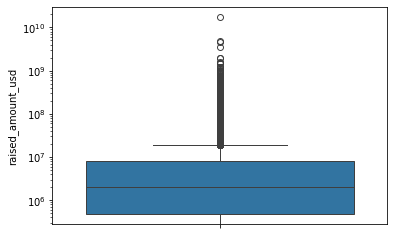

In [119]:
# distribution of raised_amount_usd
sns.boxplot(y=df.raised_amount_usd)
plt.yscale('log')
plt.show

Let's also look at the summary metrics.

In [120]:
# summary metrics
df['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

Note that there's a significant difference between the mean and the median - USD 9.5m and USD 2m. Let's also compare the summary stats across the four categories.

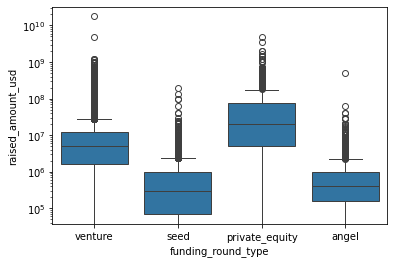

In [121]:
#comparing summary stats across four categories
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

In [122]:
# compare the mean and median values across categories
df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07

Note that there's a large difference between the mean and the median values for all four types. For type venture, for e.g. the median is about 20m while the mean is about 70m. 

Thus, the choice of the summary statistic will drastically affect the decision (of the investment type). Let's choose median, since there are quite a few extreme values pulling the mean up towards them - but they are not the most 'representative' values.



In [123]:
#compare the median investment amount across the types
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

The median investment amount for type 'private_equity' is approx. USD 20m, which is beyond Spark Funds' range of 5-15m. The median of 'venture' type is about USD 5m, which is suitable for them. The average amounts of angel and seed types are lower than their range.

Thus, 'venture' type investment will be most suited to them.

## Country Analysis

Let's now compare the total investment amounts across countries. Note that we'll filter the data for only the 'venture' type investments and then compare the 'total investment' across countries.

In [124]:
#filter the 
#group by country codes and compare the total funding amount
country_wise_total =df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(country_wise_total)

country_code
USA    5.084739e+11
CHN    6.100092e+10
GBR    2.689981e+10
IND    2.104911e+10
CAN    1.316891e+10
DEU    8.580103e+09
ISR    8.101823e+09
FRA    8.078614e+09
NLD    5.058484e+09
RUS    4.951284e+09
JPN    4.468966e+09
SGP    4.002355e+09
BRA    3.884308e+09
CHE    3.500450e+09
SWE    3.408392e+09
ESP    3.254899e+09
KOR    2.681655e+09
IRL    2.344873e+09
AUS    2.164869e+09
DNK    1.591721e+09
BEL    1.466434e+09
NOR    1.324466e+09
FIN    1.209716e+09
MYS    1.077349e+09
HKG    9.808777e+08
TWN    9.025236e+08
IDN    8.442470e+08
BMU    8.178160e+08
AUT    7.859402e+08
GRD    7.500000e+08
ARE    7.078432e+08
ITA    6.788957e+08
ZAF    6.397179e+08
NZL    6.226298e+08
TUR    5.994951e+08
MEX    4.888209e+08
EGY    4.267294e+08
LUX    3.754395e+08
ARG    3.443836e+08
NGA    3.431780e+08
CZE    2.920910e+08
KEN    2.721498e+08
VNM    2.636205e+08
PHL    2.610419e+08
PRT    1.772434e+08
CYM    1.564329e+08
POL    1.444979e+08
THA    1.268266e+08
EST    1.160298e+08
COL    

lets now extract the top 9 countries from countryw_Wise_total

In [125]:
#top 9 countries
top_9_countires = country_wise_total[:9]
top_9_countires

country_code
USA    5.084739e+11
CHN    6.100092e+10
GBR    2.689981e+10
IND    2.104911e+10
CAN    1.316891e+10
DEU    8.580103e+09
ISR    8.101823e+09
FRA    8.078614e+09
NLD    5.058484e+09
Name: raised_amount_usd, dtype: float64

Amount the top 9 countries,USA,GBR,IND are the top three english speaking countries,let's filter the data frame so it only contain the top 3 countries

In [126]:
#filtering the top three countries
df=df[(df.country_code=='USA')|(df.country_code=="GBR")|(df.country_code=='IND')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
6,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


After filtering for 'venture' investments and the three countries USA,GBA and india,the filltered df look like this


In [127]:
#filtered df has about 38800 observation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57190 entries, 0 to 88528
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                57190 non-null  object 
 1   name                     57189 non-null  object 
 2   category_list            57190 non-null  object 
 3   status                   57190 non-null  object 
 4   country_code             57190 non-null  object 
 5   funding_round_permalink  57190 non-null  object 
 6   funding_round_type       57190 non-null  object 
 7   funded_at                57190 non-null  object 
 8   raised_amount_usd        57190 non-null  float64
dtypes: float64(1), object(8)
memory usage: 4.4+ MB


One can visually analyse the distribution and the total values of funding amount


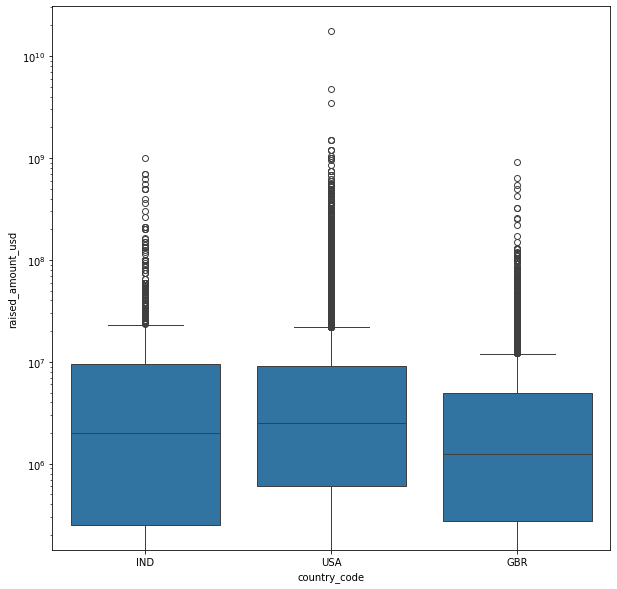

In [128]:
#boxplot to  see the distribution of funding amount across countires

plt.figure(figsize=(10,10))
sns.boxplot(x='country_code',y='raised_amount_usd',data=df)
plt.yscale('log')
plt.show()

Now,We have shortlisted the invesment type(venture) and the three countries.Lets now choose the sectors

## Sector Analysis

First, we need to extract the main sector using the column ```category_list```. The category_list column contains values such as 'Biotechnology|Health Care' - in this, 'Biotechnology' is the 'main category' of the company, which we need to use.

Let's extract the main categories in a new column.

In [129]:
#Extracting the main category                      #dropping words after | for easy understanding in new main_category
df.loc[:,'main_category']=df['category_list'].apply(lambda x: x.split("|")[0])
df.head()


,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,Application Platforms
6,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0,Analytics
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics


We can now drop the category_list column

In [130]:
#drop the category_list column
df=df.drop('category_list',axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
1,/organization/-qounter,:Qounter,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,Application Platforms
6,/organization/0xdata,H2O.ai,operating,USA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0,Analytics
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics


Now, we'll read the ```mapping.csv``` file and merge the main categories with its corresponding column. 

In [131]:
#read mapping file
mapping = pd.read_csv('mapping.csv',sep=",")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Fristly let's get rid of missing vlaues since we will not be able to merge those rows anyway

In [132]:
# missing values in mapping file
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [133]:
#removing the rows with missing values
mapping=mapping[~pd.isnull(mapping.category_list)]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

Now since we need to merge the mapping files with the main dataframe(df),lets convert the common colum to lowercase in both

In [134]:
#converting common columns to lowercase
mapping['category_list']=mapping['category_list'].str.lower()
df['main_category']=df['main_category'].str.lower()

In [135]:
#look at heads
print(mapping.head())

      category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
1                3d                    0       0                           0   
2       3d printing                    0       0                           0   
3     3d technology                    0       0                           0   
4        accounting                    0       0                           0   
5  active lifestyle                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   
5              0       1              0                           0       0   

   Social, Finance, Analytics, Advertising  

In [136]:
print(df.head())

                permalink      name     status country_code  \
0     /organization/-fame     #fame  operating          IND   
1  /organization/-qounter  :Qounter  operating          USA   
6    /organization/0xdata    H2O.ai  operating          USA   
7    /organization/0xdata    H2O.ai  operating          USA   
8    /organization/0xdata    H2O.ai  operating          USA   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
6  /funding-round/383a9bd2c04f7038bb543ccef5ba3eae               seed   
7  /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
8  /funding-round/ae2a174c06517c2394aed45006322a7e            venture   

    funded_at  raised_amount_usd          main_category  
0  05-01-2015         10000000.0                  media  
1  01-03-2014           700000.0  application platforms  
6  22-05

Let's have a look at the ```category_list``` column of the mapping file. These values will be used to merge with the main df.

In [137]:
mapping['category_list']

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object

To be able to merge all the ```main_category``` values with the mapping file's ```category_list``` column, all the values in the  ```main_category``` column should be present in the ```category_list``` column of the mapping file.

Let's see if this is true.

In [138]:
#values in main_category column in df which are not in the category_list cloumn in mapping file
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
6,/organization/0xdata,H2O.ai,operating,USA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0,analytics
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
46,/organization/100plus,100Plus,acquired,USA,/funding-round/57ce16d039aa0c61d966397f6db00b02,seed,30-11-2011,750000.0,analytics
...,...,...,...,...,...,...,...,...,...
88293,/organization/zopa,Zopa,operating,GBR,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.0,finance
88294,/organization/zopa,Zopa,operating,GBR,/funding-round/720b9f244c1f4d4fed63361d3bb0aa22,venture,01-01-2005,1000000.0,finance
88301,/organization/zora,Zora,operating,USA,/funding-round/917e4656c95902a3727d887f670888b8,seed,15-09-2015,250000.0,property management
88521,/organization/zzish,Zzish,operating,GBR,/funding-round/4c82e18a8e3eab2647719d0fc27ead5f,angel,31-10-2014,400000.0,analytics


Notice that values such as 'analytics', 'business analytics', 'finance', 'nanatechnology' etc. are not present in the mapping file.

Let's have a look at the values which are present in the mapping file but not in the main dataframe df.

In [139]:
# values in the category_list column which are not in main_category column 
mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1
89,can0bis,0,0,0,0,1,0,0,0,0
91,career ma0gement,0,0,0,0,0,0,0,0,1


If you see carefully, you'll notice something fishy - there are sectors named *alter0tive medicine*, *a0lytics*, *waste ma0gement*, *veteri0ry*, etc. This is not a *random* quality issue, but rather a pattern. In some strings, the 'na' has been replaced by '0'. This is weird - maybe someone was trying to replace the 'NA' values with '0', and ended up doing this. 

Let's treat this problem by replacing '0' with 'na' in the ```category_list``` column.

In [140]:
#replacing '0' with 'na
mapping.category_list=mapping.category_list.apply(lambda x:x.replace('0','na'))
print(mapping['category_list'])

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object


This looks fine now. Let's now merge the two dataframes.

In [141]:
#merge the dfs
df=pd.merge(df,mapping,how="inner",left_on='main_category',right_on="category_list")
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-day-media,ALL DAY MEDIA,operating,USA,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,16-12-2014,2000000.0,media,media,0,0,0,1,0,0,0,0,0


In [142]:
# let's drop the category_list column since it is the same as main_category
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,0,0,0,1,0,0,0,0,0
4,/organization/all-day-media,ALL DAY MEDIA,operating,USA,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,16-12-2014,2000000.0,media,0,0,0,1,0,0,0,0,0


In [143]:
# look at the column types and names
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57155 entries, 0 to 57154
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   permalink                                57155 non-null  object 
 1   name                                     57154 non-null  object 
 2   status                                   57155 non-null  object 
 3   country_code                             57155 non-null  object 
 4   funding_round_permalink                  57155 non-null  object 
 5   funding_round_type                       57155 non-null  object 
 6   funded_at                                57155 non-null  object 
 7   raised_amount_usd                        57155 non-null  float64
 8   main_category                            57155 non-null  object 
 9   Automotive & Sports                      57155 non-null  int64  
 10  Blanks                                   57155

### Converting the 'wide' dataframe to 'long'

You'll notice that the columns representing the main category in the mapping file are originally in the 'wide' format - Automotive & Sports, Cleantech / Semiconductors etc.

They contain the value '1' if the company belongs to that category, else 0. This is quite redundant. We can as well have a column named 'sub-category' having these values. 

Let's convert the df into the long format from the current wide format. First, we'll store the 'value variables' (those which are to be melted) in an array. The rest will then be the 'index variables'.

In [144]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame: 'DataFrame', id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index: 'bool' = True) -> 'DataFrame'
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        ``fr

In [145]:
# store the value and id variables in two separate arrays

# store the value variables in one Series
value_vars = df.columns[9:18]

# take the setdiff() to get the rest of the variables
id_vars = np.setdiff1d(df.columns, value_vars)

print(value_vars, "\n")
print(id_vars)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object') 

['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'main_category' 'name' 'permalink' 'raised_amount_usd' 'status']


In [146]:
# convert into long
long_df = pd.melt(df, 
        id_vars=list(id_vars), 
        value_vars=list(value_vars))

long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,media,#fame,/organization/-fame,10000000.0,operating,Automotive & Sports,0
1,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,media,90min,/organization/90min,15000000.0,operating,Automotive & Sports,0
2,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,media,90min,/organization/90min,5800000.0,operating,Automotive & Sports,0
3,GBR,26-03-2014,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,media,90min,/organization/90min,18000000.0,operating,Automotive & Sports,0
4,USA,16-12-2014,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,media,ALL DAY MEDIA,/organization/all-day-media,2000000.0,operating,Automotive & Sports,0


We can now get rid of the rows where the column 'value' is 0 and then remove that column altogether.

In [147]:
# remove rows having value=0
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)

In [148]:
# look at the new df
long_df.head()
len(long_df)

57155

In [149]:
# renaming the 'variable' column
long_df = long_df.rename(columns={'variable': 'sector'})

In [150]:
# info
long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57155 entries, 38969 to 514384
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country_code             57155 non-null  object 
 1   funded_at                57155 non-null  object 
 2   funding_round_permalink  57155 non-null  object 
 3   funding_round_type       57155 non-null  object 
 4   main_category            57155 non-null  object 
 5   name                     57154 non-null  object 
 6   permalink                57155 non-null  object 
 7   raised_amount_usd        57155 non-null  float64
 8   status                   57155 non-null  object 
 9   sector                   57155 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.8+ MB


The dataframe now contains only venture type investments in countries USA, IND and GBR, and we have mapped each company to one of the eight main sectors (named 'sector' in the dataframe). 

We can now compute the sector-wise number and the amount of investment in the three countries.

In [151]:
# summarising the sector-wise number and sum of venture investments across three countries

# first, let's also filter for investment range between 5 and 15m
df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]


In [152]:
# groupby country, sector and compute the count and sum
df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         17  1.731126e+08
             Cleantech / Semiconductors                 133  1.189424e+09
             Entertainment                               57  4.964219e+08
             Health                                      26  2.315375e+08
             Manufacturing                               45  3.919700e+08
             News, Search and Messaging                  82  6.739882e+08
             Others                                     153  1.332944e+09
             Social, Finance, Analytics, Advertising    143  1.173556e+09
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  21  1.739800e+08
             Entertainment                               34  2.938300e+08
             Health                                      20  1.737400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  53  4.398345e+08
             Others                                     114  1.045910e+09
             Social, Finance, Analytics, Advertising     64  5.734496e+08
USA          Automotive & Sports                        178  1.545522e+09
             Cleantech / Semiconductors                2466  2.271671e+10
             Entertainment                              609  5.237908e+09
             Health                                     965  8.670416e+09
             Manufacturing                              822  7.453793e+09
             News, Search and Messaging                1634  1.434637e+10
             Others                                    3040  2.709383e+10
             Social, Finance, Analytics, Advertising   2829  2.468084e+10

This will be much more easy to understand using a plot.

/var/folders/gv/k2xjgmjs1hl_s0q7bxtvvyd80000gn/T/ipykernel_17366/2459530057.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set_xticklabels(p.get_xticklabels(),rotation=30)
/var/folders/gv/k2xjgmjs1hl_s0q7bxtvvyd80000gn/T/ipykernel_17366/2459530057.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  q.set_xticklabels(q.get_xticklabels(),rotation=30)


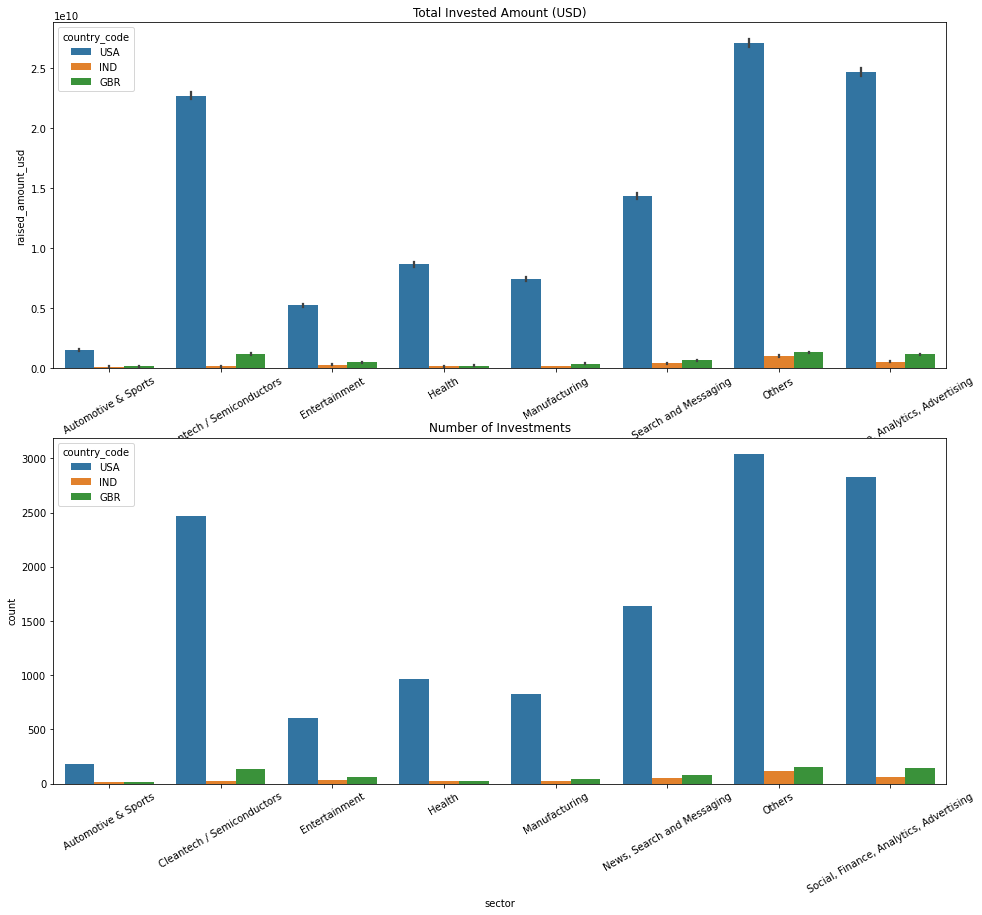

In [153]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show()

Thus, the top country in terms of the number of investments (and the total amount invested) is the USA. The sectors 'Others', 'Social, Finance, Analytics and Advertising' and 'Cleantech/Semiconductors' are the most heavily invested ones.

In case you don't want to consider 'Others' as a sector, 'News, Search and Messaging' is the next best sector.